# 2023 vs. 2024: Exploratory Data Analysis & Comparative performance

- Análise mercadologica das corridas
- Aumento do hype
- Maior participação de jovens
- Diminuição da performance
- Estudo das maiores reincidências (agrupamentos e tals...)
- Estudo dos avanços e retrocessos (as pessoas geralmente melhoram ou pioram? Qual o máximo que dá pra melhorar em um ano?)
- Tentar fazer alguma previsão

#### Hipóteses
- Corredores reincidentes são melhores!
- Corredores mais velhos são melhores!
- Existe um grupo específico com maior chance de reincidência!

## 0. Imports

In [238]:
import pandas as pd
import json
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from random import randint
from math import ceil, floor
import matplotlib.image as mpimg

from matplotlib.ticker import FuncFormatter

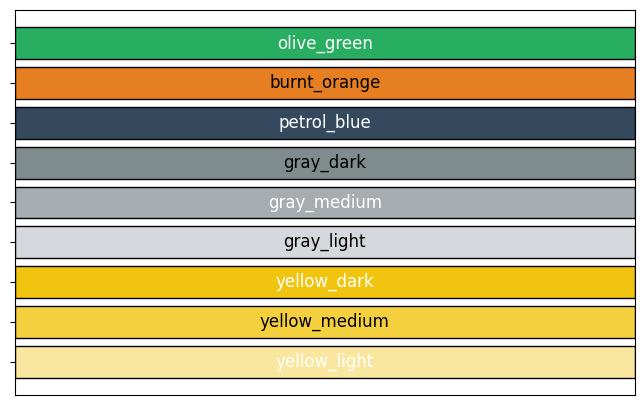

In [239]:
# Importing visual identity
def load_color_palette(file_path):
    with open(file_path, 'r') as file:
        color_palette = json.load(file)
    return color_palette

file_path = r'..\utils\color_palette.json'
color_palette = load_color_palette(file_path)

fig, ax = plt.subplots(figsize=(8, 5))

# Loop para mostrar cada cor
for i, (name, color) in enumerate(color_palette.items()):
    ax.barh(i, 1, color=color, edgecolor='black')
    ax.text(0.5, i, name, va='center', ha='center', fontsize=12, color='white' if i%2 == 0 else 'black')

# Configurações do eixo
ax.set_xlim(0, 1)
ax.set_yticks(range(len(color_palette)))
ax.set_yticklabels([])
ax.set_xticks([])

plt.show()

In [240]:
def colocar_logo(_fig, tamanho=1, alpha=0.5):  # Add 'alpha' parameter for transparency

    logo = mpimg.imread(r'..\utils\corrida_do_galo.png')
    x_size = 0.06 * tamanho
    y_size = x_size / 2
    x_coord = 0.97 - x_size
    y_coord = 0.98 - y_size
    logo_ax = _fig.add_axes([x_coord, y_coord, x_size, y_size], anchor='NE', zorder=1)
    
    # Display the image with transparency
    logo_ax.imshow(logo, alpha=alpha)
    logo_ax.axis('off')

## 1. Data extraction

In [241]:
dir_path = r'..\data\treated'
files = os.listdir(dir_path)
dfs = {}

for _file in files:
    file_path = os.path.join(dir_path, _file)
    df = pd.read_parquet(file_path)
    df['year'] = int(_file.replace('.parquet', '').replace('results_', ''))
    dfs[_file.replace('.parquet', '')] = df

df = pd.concat([dfs['results_2024'], dfs['results_2023']], ignore_index=True)


In [242]:
counter = pd.DataFrame(df.groupby('athlete').size().sort_values(ascending=False)).reset_index()
counter.columns=['athlete', 'counter']
counter.groupby('counter').size()

counter
1    15036
2     2300
3       20
4        3
5        1
7        1
dtype: int64

In [243]:
counter.loc[counter['counter'] == 2].sample(10)

,athlete,counter
1375,JOAO VITAL DE SOUZA,2
1041,LUCIA RAQUEL SANTOS,2
1511,IAGO PORTO ABRITTA,2
1799,ARNALDO CESAR NOVAIS,2
1761,FLAVIA VIANA DO AMARAL,2
695,NAIARA CRISTINA PEREIRA,2
1872,EUGENIO DE SA ROCHA,2
914,MARCIO CLAYTON LOPES RIBEIRO,2
345,ROSIMEIRE C CRUZ,2
1629,GLAUCIA DIAS,2


## 2. Check data quality

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           19720 non-null  int64  
 1   num           19720 non-null  int64  
 2   athlete       19720 non-null  object 
 3   gender        19720 non-null  object 
 4   age           19720 non-null  int64  
 5   group         19720 non-null  object 
 6   ag            19700 non-null  float64
 7   c             19720 non-null  object 
 8   team          19720 non-null  object 
 9   time          19720 non-null  object 
 10  distance      19720 non-null  object 
 11  part_time_h   19720 non-null  int64  
 12  part_time_m   19720 non-null  int64  
 13  part_time_s   19720 non-null  int64  
 14  total_time_s  19720 non-null  int64  
 15  total_time_m  19720 non-null  float64
 16  total_time_h  19720 non-null  float64
 17  dist_num      19720 non-null  int64  
 18  pace          19720 non-nu

In [245]:
df.describe()

,pos,num,age,ag,part_time_h,part_time_m,part_time_s,total_time_s,total_time_m,total_time_h,dist_num,year
count,19720.000000,19720.000000,19720.000000,19700.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000
mean,1762.182809,6312.573529,38.610041,195.853350,0.189300,35.433215,29.444270,2836.917901,47.281965,0.788033,6.005071,2023.575355
std,1311.150288,3976.380134,13.011585,174.743207,0.439697,14.237690,17.299366,1199.005143,19.983419,0.333057,2.003844,0.494302
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,936.000000,15.600000,0.260000,5.000000,2023.000000
25%,627.000000,3052.750000,30.000000,58.000000,0.000000,30.000000,15.000000,2093.000000,34.883333,0.581389,5.000000,2023.000000
50%,1474.500000,6003.000000,39.000000,142.000000,0.000000,37.000000,29.000000,2522.000000,42.033333,0.700556,5.000000,2024.000000
75%,2707.000000,9186.500000,47.000000,292.000000,0.000000,45.000000,44.000000,3254.000000,54.233333,0.903889,5.000000,2024.000000
max,5251.000000,16901.000000,86.000000,826.000000,3.000000,59.000000,59.000000,11929.000000,198.816667,3.313611,10.000000,2024.000000


In [246]:
values = df['gender'].unique()
print(f'Gender variations: {values}')

values = sorted(df['group'].unique())
print(f'Group variations: {values}')

Gender variations: ['F' 'M']
Group variations: ['F0014', 'F1519', 'F2024', 'F2529', 'F3034', 'F3539', 'F4044', 'F4549', 'F5054', 'F5559', 'F6064', 'F6569', 'F7074', 'F7579', 'F8084', 'M0014', 'M1519', 'M2024', 'M2529', 'M3034', 'M3539', 'M4044', 'M4549', 'M5054', 'M5559', 'M6064', 'M6569', 'M7074', 'M7579', 'M8084', 'M8589']


## 3. Data comprehention

### 3.1. Athletes

#### 3.1.1. Total athletes

In [247]:
total_2023 = df.loc[df['year'] == 2023, 'num'].count()
total_2024 = df.loc[df['year'] == 2024, 'num'].count()
print(f'Total athletes in 2023: {total_2023}\nTotal athletes in 2024: {total_2024}')

variacao = (total_2024 - total_2023) / total_2023
sinal = '+' if variacao > 0 else '-'
variacao_str = f'{sinal}{variacao:.1%}'
print(f'Vriation of {variacao_str} athletes between 2023-24 editions')

Total athletes in 2023: 8374
Total athletes in 2024: 11346
Vriation of +35.5% athletes between 2023-24 editions


#### 3.1.2. Total athletes vs. distance

In [248]:
total_2023_5 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 5), 'num'].count()
total_2023_10 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 10), 'num'].count()
total_2023_5_percent = total_2023_5 / (total_2023_5+total_2023_10)
total_2023_10_percent = total_2023_10 / (total_2023_5+total_2023_10)

total_2024_5 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 5), 'num'].count()
total_2024_10 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 10), 'num'].count()
total_2024_5_percent = total_2024_5 / (total_2024_5+total_2024_10)
total_2024_10_percent = total_2024_10 / (total_2024_5+total_2024_10)

print(f'2023 distance distribuition: {total_2023_5} 5km vs {total_2023_10} 10km ({total_2023_5_percent:.1%} vs {total_2023_10_percent:.1%})')
print(f'2024 distance distribuition: {total_2024_5} 5km vs {total_2024_10} 10km ({total_2024_5_percent:.1%} vs {total_2024_10_percent:.1%})')

2023 distance distribuition: 6508 5km vs 1866 10km (77.7% vs 22.3%)
2024 distance distribuition: 9248 5km vs 2098 10km (81.5% vs 18.5%)


#### 3.1.3. Total athletes vs. gender

In [249]:
total_2023_m = df.loc[(df['year'] == 2023) & (df['gender'] == 'M'), 'num'].count()
total_2023_f = df.loc[(df['year'] == 2023) & (df['gender'] == 'F'), 'num'].count()
total_2023_m_percent = total_2023_m / (total_2023_m+total_2023_f)
total_2023_f_percent = total_2023_f / (total_2023_m+total_2023_f)

total_2024_m = df.loc[(df['year'] == 2024) & (df['gender'] == 'M'), 'num'].count()
total_2024_f = df.loc[(df['year'] == 2024) & (df['gender'] == 'F'), 'num'].count()
total_2024_m_percent = total_2024_m / (total_2024_m+total_2024_f)
total_2024_f_percent = total_2024_f / (total_2024_m+total_2024_f)

print(f'2023 gender distribuition: {total_2023_m} M vs {total_2023_f} F ({total_2023_m_percent:.1%} vs {total_2023_f_percent:.1%})')
print(f'2024 gender distribuition: {total_2024_m} M vs {total_2024_f} F ({total_2024_m_percent:.1%} vs {total_2024_f_percent:.1%})')

2023 gender distribuition: 4253 M vs 4121 F (50.8% vs 49.2%)
2024 gender distribuition: 5438 M vs 5908 F (47.9% vs 52.1%)


#### 3.1.4. Total athletes vs. ages

In [250]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')
pivot_ages_transp = pivot_ages.T

pivot_ages_transp['2023_percent'] = pivot_ages_transp[2023] / pivot_ages_transp[2023].sum()
pivot_ages_transp['2024_percent'] = pivot_ages_transp[2024] / pivot_ages_transp[2024].sum()

pivot_ages = pivot_ages_transp.T
pivot_ages


C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_18620\1443749921.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')


age_group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
year,,,,,,,,,
2023,51.000000,471.000000,1289.000000,2445.000000,2537.000000,1078.000000,368.000000,62.000000,2.000000
2024,37.000000,820.000000,2320.000000,3189.000000,2995.000000,1368.000000,424.000000,65.000000,11.000000
2023_percent,0.006142,0.056726,0.155245,0.294472,0.305552,0.129833,0.044321,0.007467,0.000241
2024_percent,0.003295,0.073025,0.206608,0.283997,0.266720,0.121827,0.037759,0.005789,0.000980


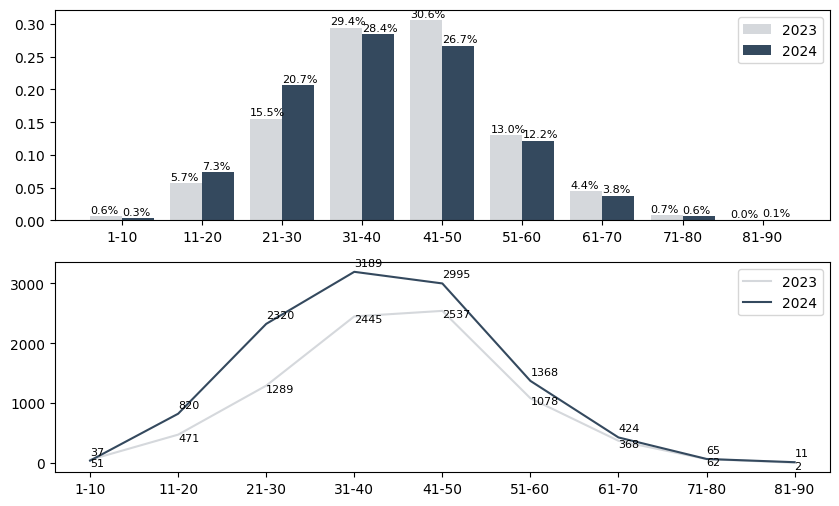

In [251]:
fig, axs = plt.subplots(nrows=2, figsize=(10,6))

bar_width = 0.4

index = pivot_ages_transp.index
xs = np.arange(len(index))
percent_2023 = pivot_ages_transp['2023_percent'].values
percent_2024 = pivot_ages_transp['2024_percent'].values

axs[0].bar(x=xs-bar_width/2, height=percent_2023, width=bar_width, color=color_palette['gray_light'], label='2023')
axs[0].bar(x=xs+bar_width/2, height=percent_2024, width=bar_width, color=color_palette['petrol_blue'], label='2024')

total_2023 = pivot_ages_transp[2023].values
total_2024 = pivot_ages_transp[2024].values

axs[1].plot(total_2023, c=color_palette['gray_light'], label='2023')
axs[1].plot(total_2024, c=color_palette['petrol_blue'], label='2024')

for i, x in enumerate(xs):
    p_2023 = percent_2023[i]
    axs[0].annotate(text=f'{p_2023:.1%}', xy=(x-bar_width, percent_2023[i]+0.005), fontsize=8)

    p_2024 = percent_2024[i]
    axs[0].annotate(text=f'{p_2024:.1%}', xy=(x, percent_2024[i]+0.005), fontsize=8)

    t_2023 = total_2023[i]
    axs[1].annotate(text=f'{t_2023}', xy=(x, total_2023[i]-100), fontsize=8)

    t_2024 = total_2024[i]
    axs[1].annotate(text=f'{t_2024}', xy=(x, total_2024[i]+100), fontsize=8)

axs[0].set_xticks(xs)
axs[0].set_xticklabels(index)

axs[1].set_xticks(xs)
axs[1].set_xticklabels(index)

axs[0].legend()
axs[1].legend()

plt.show()

#### 3.1.5 Considerations

There has been a significant increse in total athletes from 2023 to 2024

Possible increse of athletes interest in the 5km race (2023: 5km 77.7% vs 10km 22.3% / 2024: 5km 81.5% vs 10km 18.5%) + 3.8%

People from 21 to 40 yo seems to have gained significantly more interest in Galo's Race

### 3.2. Gerneral performance - average pace

- Qual o pace médio geral 23 vs 24?
- Qual o pace médio por categoria 23 vs 24?
- Qual o pace médio por age group & categoria 23 vs 24?

In [252]:
def get_mean_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].sum())
    filtered_dataframe.columns = ['summed_time', 'summed_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['summed_time'] / filtered_dataframe['summed_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

In [253]:
def get_median_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].median())
    filtered_dataframe.columns = ['median_time', 'median_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['median_time'] / filtered_dataframe['median_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

In [254]:
# Function to convert seconds to "mm:ss" format
def seconds_to_pace(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f'{minutes:02d}:{seconds:02d}'

#### 3.2.1. Avg  Pace: by distance, gender and year

In [255]:
def plot_paces(df, display:str, summarize_by:list, plot_palette:list=None, figsize=None, annotate=1, metrics=None):

    for i, column in enumerate(summarize_by):
        if i == 0:
            df['category'] = df[summarize_by[0]].astype(str)
        else:
            df['category'] = df['category'].str.cat(df[column].astype(str), sep='-')

    years = df['year'].unique()
    distances = df['dist_num'].unique()

    if metrics == None:
        metrics = []

    if plot_palette == None:
        plot_palette = [color_palette["gray_light"], color_palette["petrol_blue"]]

    if display == 'h':
        n_cols = len(distances)
        n_rows = 1
    elif display == 'v':
        n_cols = 1
        n_rows = len(distances)
    
    if not figsize:
        figsize = (n_cols*5,n_rows*3)

    fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize)

    bar_width = 0.4

    for p, distance in enumerate(distances):
        mean_pace_distance_df = df.loc[df['dist_num'] == distance]

        if 'max' in metrics:
            max_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].max()
            ax[p].axhline(y=max_pace, color=color_palette['yellow_light'], linestyle='--', label=f'Max')

        if 'mean' in metrics:
            mean_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].mean()
            ax[p].axhline(y=mean_pace, color=color_palette['olive_green'], linestyle='--', label=f'Mean')

        if 'min' in metrics:
            min_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].min()
            ax[p].axhline(y=min_pace, color=color_palette['yellow_dark'], linestyle='--', label=f'Min')

        for i, year in enumerate(years):
            mean_pace_df_filtered = mean_pace_distance_df.loc[mean_pace_distance_df['year'] == year]
            pace_values_s = mean_pace_df_filtered['pace_s'].values
            pace_formatted = mean_pace_df_filtered['pace_time'].values
            index = mean_pace_df_filtered['category'].values
            xs = np.arange(len(index))

            n_years = len(years)
            horizontal_offset = bar_width*(-n_years/2 + 0.5 + i)
            ax[p].bar(x=xs+horizontal_offset, height=pace_values_s, width=bar_width, align='center', color=plot_palette[i], label=year)

            top_annotate_sort = ceil(annotate *100)
            for j, x in enumerate(xs):
                if top_annotate_sort > randint(0, 100):
                    ax[p].annotate(text=pace_formatted[j] ,xy=(x+horizontal_offset, pace_values_s[j]+5), ha='center')

            ax[p].set_xticks(xs)
            ax[p].set_xticklabels(index)

            # Apply custom Y-axis labels
            formatter = FuncFormatter(seconds_to_pace)
            ax[p].yaxis.set_major_formatter(formatter)

        # Add labels and legend
        ax[p].set_xlabel(f'Distance: {distance} km')
        ax[p].set_ylabel('Pace')
        ax[p].legend()

        
        
    plt.show()

MEAN PACE (2023 vs 2024)

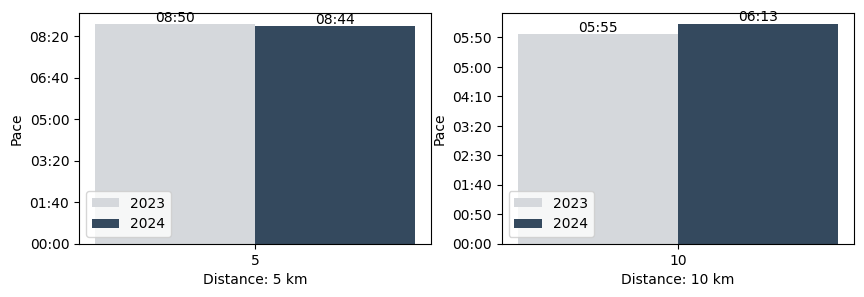

In [256]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['year'])
plot_paces(mean_pace_df, display='h', summarize_by=['dist_num'])

MEDIAN PACE (2023 vs 2024)

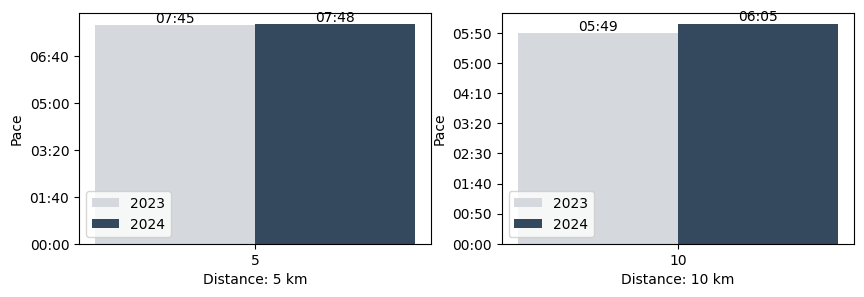

In [257]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['year'])
plot_paces(mean_pace_df, display='h', summarize_by=['dist_num'])

MEAN PACE By GENDER (2023 vs 2024)

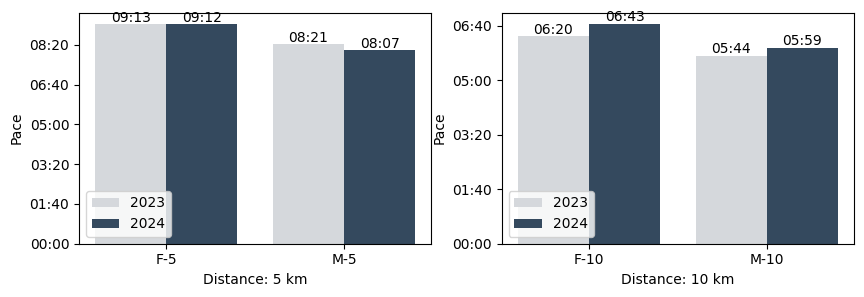

In [258]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df, display='h', summarize_by=['gender', 'dist_num'])

MEDIAN PACE By GENDER (2023 vs 2024)

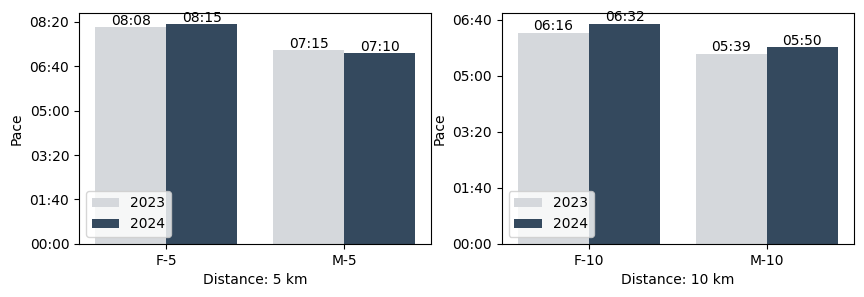

In [259]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df, display='h', summarize_by=['gender', 'dist_num'])

MEAN PACE By AGE GROUP (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_18620\1384047525.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].sum())


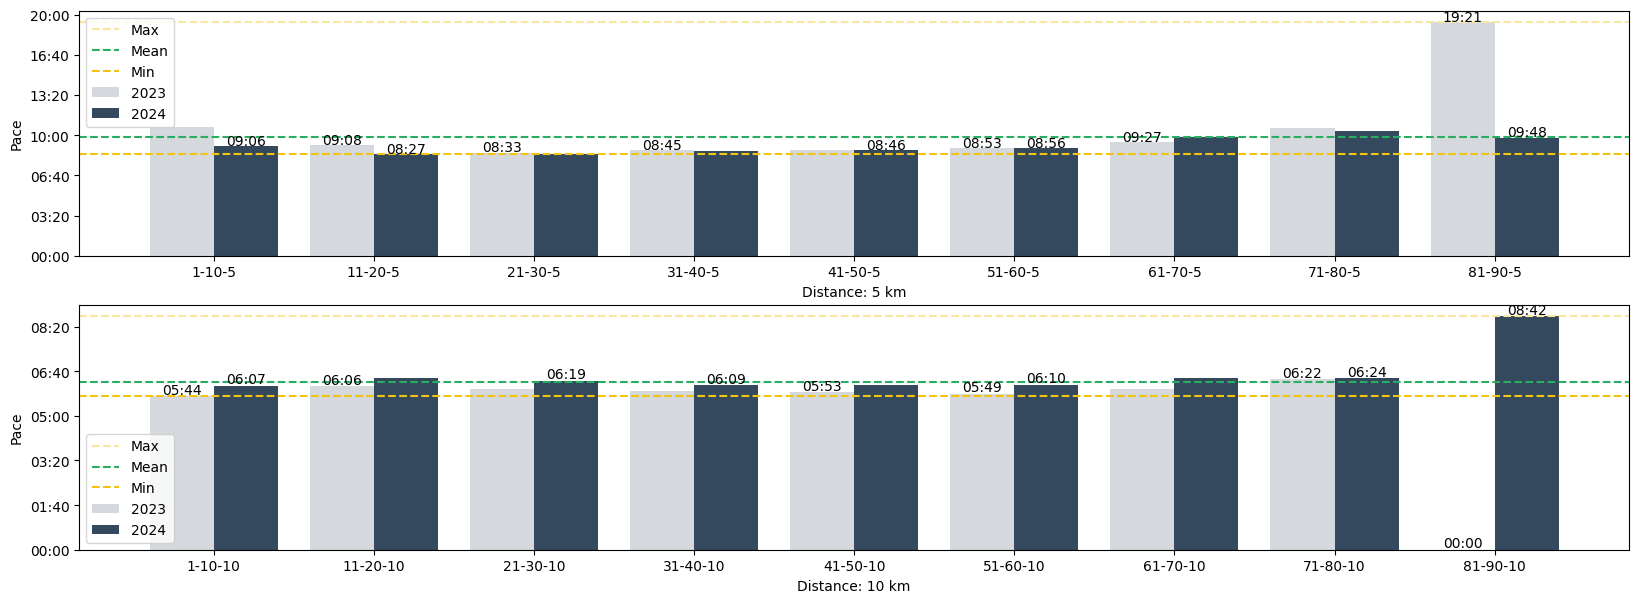

In [260]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['age_group', 'year'])
plot_paces(mean_pace_df, display='v', summarize_by=['age_group', 'dist_num'], figsize=(20,7), annotate=0.7, metrics=['max', 'min', 'mean'])

MEDIAN PACE By AGE GROUP (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_18620\2757856080.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].median())


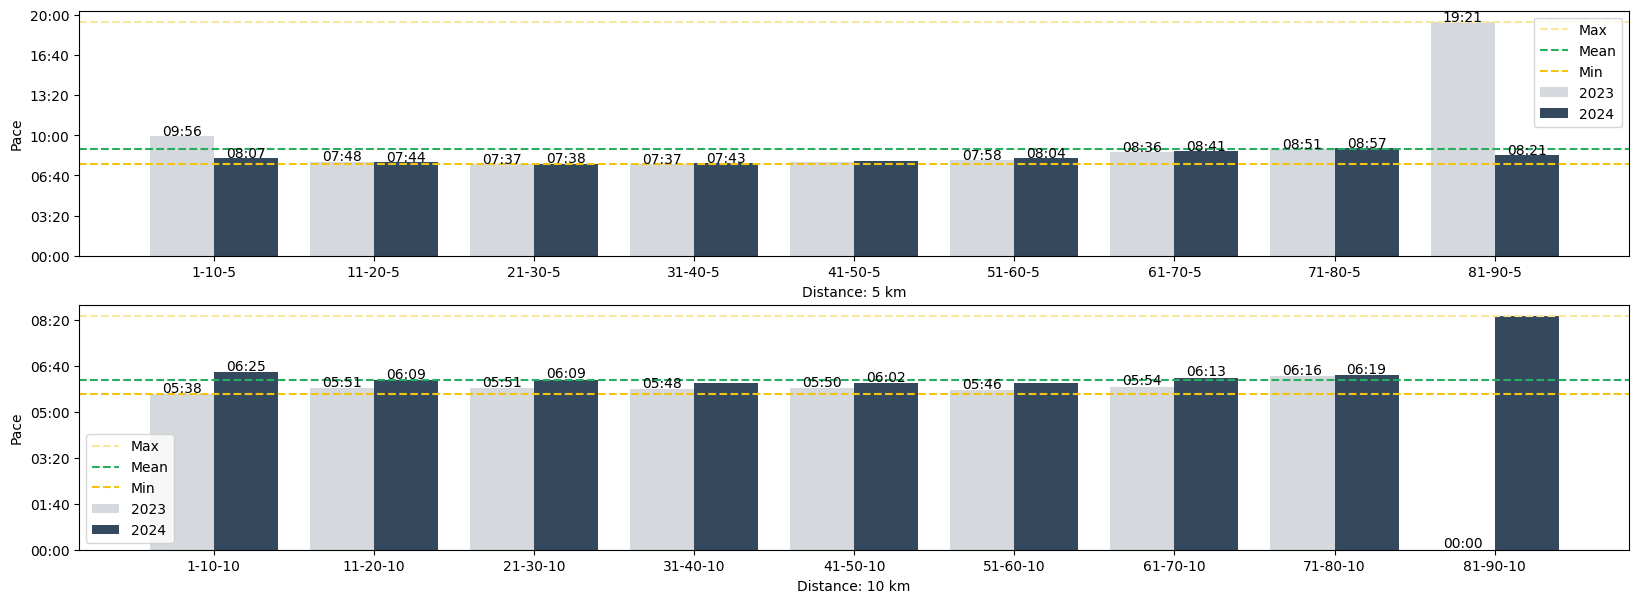

In [261]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['age_group', 'year'])
plot_paces(mean_pace_df, display='v', summarize_by=['age_group', 'dist_num'], figsize=(20,7), annotate=0.9, metrics=['max', 'min', 'mean'])

#### 3.2.2. Box Plots: by distance, gender and year

In [262]:
df

,pos,num,athlete,gender,age,group,ag,c,team,time,...,part_time_h,part_time_m,part_time_s,total_time_s,total_time_m,total_time_h,dist_num,pace,year,age_group
0,1,11814,JOZELI JANIS DE CASTRO,F,42,F4044,1.0,,CASA DO DO\nCORREDOR,00:39:45,...,0,39,45,2385,39.750000,0.662500,10,00:03:58.500000,2024,41-50
1,2,11605,JULIANA CRISTINA DE OLIVEIRA VIEIRA,F,31,F3034,1.0,,,00:42:31,...,0,42,31,2551,42.516667,0.708611,10,00:04:15.100000,2024,31-40
2,3,11018,IZABELA TIAGO GERMANO,F,30,F3034,2.0,,,00:44:13,...,0,44,13,2653,44.216667,0.736944,10,00:04:25.300000,2024,21-30
3,4,11442,ROBERTA KELLE FERREIRA,F,33,F3034,3.0,,,00:44:36,...,0,44,36,2676,44.600000,0.743333,10,00:04:27.600000,2024,31-40
4,5,12274,JOSELI MARIA FERREIRA,F,37,F3539,1.0,,ITAUNARUNNERS,00:45:14,...,0,45,14,2714,45.233333,0.753889,10,00:04:31.400000,2024,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19715,2929,6600,ENIO GOMES DA SILVA,M,77,M7579,6.0,,MEIAS RENEGADAS\nSEPARADAS,02:39:05,...,2,39,5,9545,159.083333,2.651389,5,00:31:49,2023,71-80
19716,2930,5085,JULIANO AUGUSTO RAMOS DOS\nSANTOS,M,35,M3539,385.0,,CHIODI RUN,02:42:26,...,2,42,26,9746,162.433333,2.707222,5,00:32:29.200000,2023,31-40
19717,2931,2046,HEMERSON WAITAN SEVERIANO,M,23,M2024,154.0,,,02:43:14,...,2,43,14,9794,163.233333,2.720556,5,00:32:38.800000,2023,21-30
19718,2932,3737,RICHARD CANDIDO DO SANTO,M,17,M1519,161.0,,,02:50:34,...,2,50,34,10234,170.566667,2.842778,5,00:34:06.800000,2023,11-20


In [289]:
def mean_without_outliers_iqr(data):
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    # Return the mean of the filtered data
    return np.mean(filtered_data)

In [335]:
def boxplot_by(fig_title ,series_names, series_data):

    if type(series_names) != list:
        series_names = [series_names]

    if type(series_data) != list:
        series_data = [series_data]

    if len(series_names) == len(series_data):
        
        widths=0.6
        fig, ax = plt.subplots(figsize=(widths*len(series_names)*5, 5))
        fig.suptitle(fig_title, fontsize=16, fontweight='bold', x=0, ha='left', color=color_palette['gray_dark'])
        colocar_logo(fig, tamanho=2)
        

        # for series_name, data in zip(series_names, series_data):
        ax.boxplot(series_data, showfliers=False, widths=widths, meanline=True, showmeans=True,)
        ax.set_xticklabels(series_names)
        # y = series_data

        for i, y in enumerate(series_data, start=1):

            # Add some random "jitter" to the x-axis
            x = np.random.normal(i, widths*0.15, size=len(y))
            ax.scatter(x, y, s=1, alpha=0.2, color=color_palette['gray_dark'])

            median_seconds = np.median(y)
            mean_seconds = np.mean(y)

            # Annotate median
            def annotate_median(va):
                median_pace = seconds_to_pace(median_seconds, 0)
                median_pace_text = f'Median: {median_pace}'
                ax.annotate(text=median_pace_text, xy=(i-widths/2.1, median_seconds), fontsize=7, va=va)

            # Annotate mean
            def annotate_mean(va):
                mean_pace = seconds_to_pace(mean_seconds, 0)
                mean_pace_text = f'Mean: {mean_pace}'
                ax.annotate(text=mean_pace_text, xy=(i-widths/2.1, mean_seconds), fontsize=7, va=va)

            if median_seconds > mean_seconds:
                annotate_median('bottom')
                annotate_mean('top')
            else:
                annotate_median('top')
                annotate_mean('bottom')
        
        # Apply custom Y-axis labels
        formatter = FuncFormatter(seconds_to_pace)
        ax.yaxis.set_major_formatter(formatter)
        ax.set_ylabel('Pace')
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
        plt.show()
    
    else:
        raise('series_name and series_data must have same length')

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_18620\444646925.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


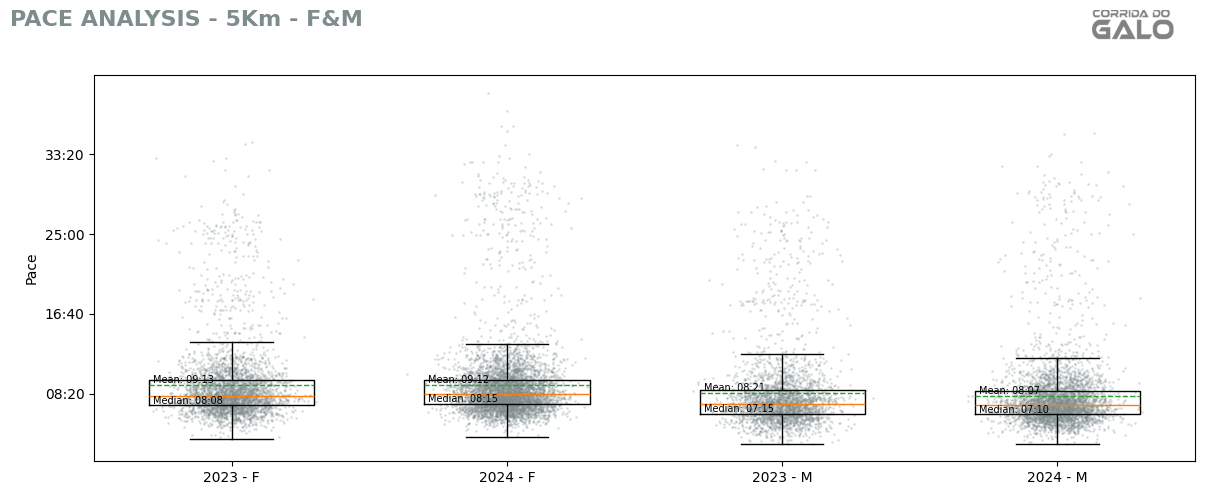

In [336]:
df['pace_s'] = df['total_time_s']/df['dist_num']
series_data = [
    df.loc[(df['year']==2023) & (df['dist_num']==5) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==5) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2023) & (df['dist_num']==5) & (df['gender']=='M'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==5) & (df['gender']=='M'), 'pace_s']
    ]
boxplot_by(fig_title='PACE ANALYSIS - 5Km - F&M', series_names=['2023 - F', '2024 - F', '2023 - M', '2024 - M'], series_data=series_data)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_18620\444646925.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


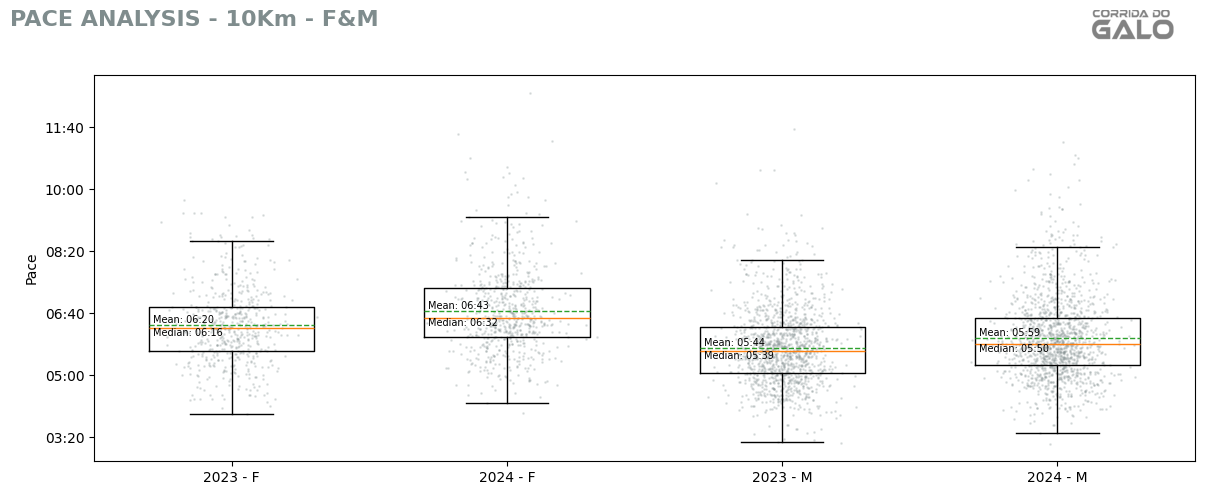

In [337]:
df['pace_s'] = df['total_time_s']/df['dist_num']
series_data = [
    df.loc[(df['year']==2023) & (df['dist_num']==10) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==10) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2023) & (df['dist_num']==10) & (df['gender']=='M'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==10) & (df['gender']=='M'), 'pace_s']
    ]
boxplot_by(fig_title='PACE ANALYSIS - 10Km - F&M', series_names=['2023 - F', '2024 - F', '2023 - M', '2024 - M'], series_data=series_data)

#### 3.2.3. Considerations

5km paces seem to be pretty stable by looking at avgs from 2023 and 2024 runs;

10km paces have gotten a slightly worse from 2023 to 2024

### 3.3. Personal performance

#### 3.3.1. Overall

#### 3.3.2. In Age Group

## 4. Hypothesis